In [26]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


# A partir du jeu de données original, créer:

## un Dataframe comportant tous les modules en précisant l’effectif des apprenants, le nombre total de sessions, le score maximal, le score minimal, le taux de réussite (pour les apprenants des scores > 50)

## un tableau 2D Numpy avec les données des 10 tops modules selon les taux de réussites (Chaque ligne représente un module)


NameError: name 'self' is not defined

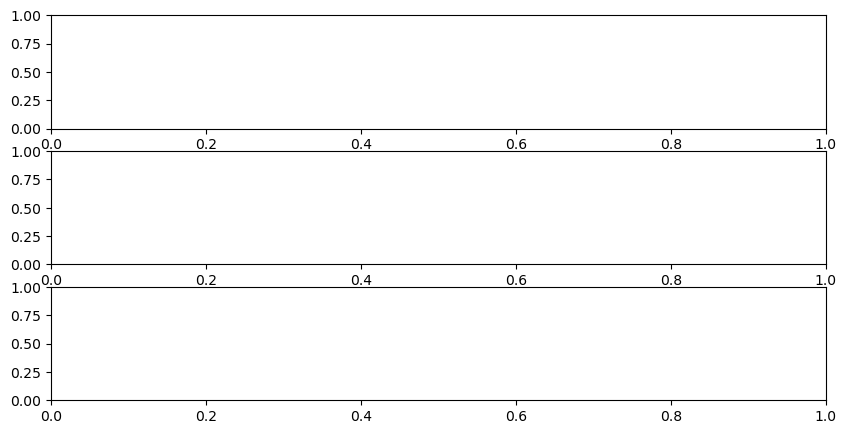

In [73]:
class DATAFRAME():
#     def __init__(self):
        
        
    
    def moduleDATA(self,cheminDATA):
        DATA_INIT=pd.read_csv(cheminDATA, delimiter=";")
        return DATA_INIT
    
    def moduleDAT(self,cheminDATA):
        moduleDATA()
        DATA_INIT= self.moduleDATA(cheminDATA)
        actor=self.DATA_INIT.groupby('object_id').actor.nunique()
        session_id=self.DATA_INIT.groupby('object_id').session_uuid.count()
        score_min=self.DATA_INIT.groupby('object_id').score.min()
        score_max=self.DATA_INIT.groupby('object_id').score.max()
        DATAFRAME_MODULE=pd.DataFrame({'actor':actor,'session_uuid':session_id,'score_min':score_min,'score_max':score_max})
        SCORE_SUP50=self.DATA_INIT[self.DATA_INIT['score' ] >=50]
        nbre_reussite=self.SCORE_SUP50.groupby(['object_id','actor']).score.max()
        nbre_reussite=nbre_reussite.reset_index()
        nbre_r=self.nbre_reussite.groupby('object_id').score.count()
        taux_reussite=(nbre_r/actor)*100
        taux_reussite.sort_values(ascending = False)
        self.DATAFRAME_MODULE['taux_reussite']=taux_reussite
        self.DATAFRAME_MODULE['taux_reussite']=self.DATAFRAME_MODULE['taux_reussite'].fillna(0)

        return  DATAFRAME_MODULE
    




    def TOPTRI(self,DATAFRAME_MODULE):
        moduleDAT()
        TRI_MODULE=DATAFRAME_MODULE.sort_values(by='taux_reussite', ascending=False)
        TOP10_MODULE=TRI_MODULE.head(10)
        return  TOP10_MODULE
    
    
    def TOPTRI(self,DATAFRAME_MODULE):
        moduleDAT()
        TRI_MODULE=DATAFRAME_MODULE.sort_values(by='taux_reussite', ascending=False)
        TOP3_MODULE=TRI_MODULE.head(3)
        return  TOP3_MODULE
    
    def nump(self,T):
        
        TOP_T=T.to_numpy()
        return TOP_T
    
    
    
    def MODULE_INFO(self,object_id):
        
        moduleDATA()
        tmp = self.moduleDATA("scorm_tracking_copy.csv").loc[self.moduleDATA("scorm_tracking_copy.csv").object_id==object_id].groupby('actor').agg({'session_uuid':'count','score':'max','temps':'sum'})
        tmp['resultat'] =0
        tmp.loc[tmp['score']>=50,'resultat']=1
        tmp['temps']=tmp['temps']/60

        return tmp
    

    def GRAPH_TOP10(self,R):
        moduleDATA()
        plt.figure(figsize=(10,5))
        for i in range(len(R.index)):
            nbre_temps=round(self.moduleDATA("scorm_tracking_copy.csv").loc[(self.moduleDATA("scorm_tracking_copy.csv")['object_id']==R.index[i])].groupby('actor').agg({'temps':'sum'})/60,2)
            nbre_score=self.moduleDATA("scorm_tracking_copy.csv").loc[(self.moduleDATA("scorm_tracking_copy.csv")['object_id']==R.index[i])].groupby('actor').agg({'score':'max'})
            DATA_TOP10=pd.DataFrame({'score':nbre_score.score,'temps':nbre_temps.temps})
            DATA_TOP10=DATA_TOP10.sort_values(by='temps', ascending=False )
            plt.plot(DATA_TOP10['temps'],DATA_TOP10['score'],label=R.index[i])
        plt.legend()

        plt.show()
        return DATA_TOP10
    
    
    def GRAPH_B(self):
        
        fig, ax = plt.subplots(figsize=(10, 4), layout='constrained')
        categories = ['752-etudes-de-cas-et-questions','734-risques-psychosociaux',
                  '819-informatique','755-verhalten-des-mitarbeitenden','761-fallstudien-und-fragen',
                  '765-urlaub','766-unbezahlter-urlaub','729-salaire',
                  '747-modification-des-rapports-de-travail','736-conge-non-paye']


        ax.bar(categories, DATATOP["taux_reussite"]);
        
        
        
    def GRAPH_TOP3(self,object):
        moduleDATA()
   
        nbre_score= self.moduleDATA("scorm_tracking_copy.csv").loc[self.moduleDATA("scorm_tracking_copy.csv")['object_id']==object].groupby('actor').agg({'score':'max'})
        nbre_score=nbre_score.sort_values(by=['score'],ascending=False)
        nbre_score['rang']=[i for i in range(1,len(nbre_score)+1)]
        nbre_score.reset_index()
        nbre=nbre_score.to_numpy()
        y=nbre[:,0]
        x=nbre[:,1]

        return x,y
    fig,axs= plt.subplots(3,1,figsize=(10,5))

    for i in range(0,self.F.index.size):
        
        x,y=GRAPH_TOP3(F.index[i])
        axs[i].plot(x,y,label=self.F.index[i])
        axs[i].set_title(self.F.index[i])
        axs[i].set_xlabel('rang')
        axs[i].set_ylabel('score')
        
    def GRAPH_NUAGE(self,D):
        moduleDATA()
        dfi =self.moduleDATA("scorm_tracking_copy.csv").groupby('object_id').agg({'temps':'sum'})/60
        fig, ax = plt.subplots(figsize=(10, 10))
    
        dfi['rang']=[i for i in range(1,self.D.taux_reussite.size +1)]
        data =dfi.to_numpy().T
        ax.scatter(data[1],data[0], s=100, facecolor='C0', edgecolor='k');  
        
        
    def GRAPH_PI(self,TRI_MODULE):
        TOPTRI()
        module_count=self.TRI_MODULE.size
        module_count
        classe_A =self.TRI_MODULE.loc[self.TRI_MODULE['taux_reussite']>=80].size
        classe_B =self.TRI_MODULE.loc[(self.TRI_MODULE['taux_reussite']>=60)&(self.TRI_MODULE['taux_reussite']<80)].size
        classe_C =self.TRI_MODULE.loc[(self.TRI_MODULE['taux_reussite']>=50)&(self.TRI_MODULE['taux_reussite']<60)].size
        classe_D =self.TRI_MODULE.loc[TRI_MODULE['taux_reussite']<50].size
        classe_A=classe_A/module_count
        classe_B=classe_B/module_count
        classe_C=classe_C/module_count
        classe_D=classe_D/module_count
        classes=np.array([classe_A,classe_B,classe_C,classe_D])
        classes
        label=['classe_A','classe_B','classe_C','classe_D']

        plt.pie(classes, labels=label,autopct='%1.1f%%')
        plt.legend()
        plt.show()

     
